In [1]:
import pandas as pd
df = pd.read_csv('c:/data/regression/test.csv')
df

,x,y
0,1,1.619379
1,2,1.857290
2,3,2.628194
3,4,2.725426
4,5,3.498926
5,6,3.867042
6,7,4.934539
7,8,4.864829
8,9,5.241539
9,10,5.823689


In [2]:
import torch
X = torch.from_numpy(df['x'].values).unsqueeze(1).float()
y = torch.from_numpy(df['y'].values).unsqueeze(1).float()

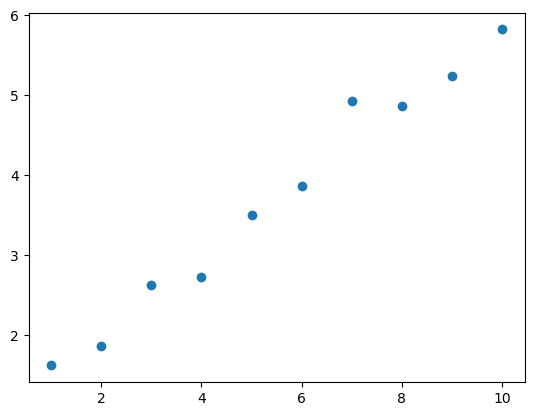

In [3]:
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.scatter(X, y)
plt.show()

In [4]:
from torch import nn
# 단순한 신경망
model = nn.Linear(in_features=1, out_features=1, bias=True)
print(model)
# 초기 파라미터
print(model.weight)
print(model.bias)

Linear(in_features=1, out_features=1, bias=True)
Parameter containing:
tensor([[-0.9968]], requires_grad=True)
Parameter containing:
tensor([-0.4418], requires_grad=True)


In [5]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)
print(model(X)) # predict(학습 전)

tensor([[ -1.4386],
        [ -2.4353],
        [ -3.4321],
        [ -4.4289],
        [ -5.4257],
        [ -6.4224],
        [ -7.4192],
        [ -8.4160],
        [ -9.4128],
        [-10.4095]], grad_fn=<AddmmBackward0>)


In [6]:
#파라미터 최적화
for step in range(500):
    prediction = model(X)
    loss = criterion(input=prediction, target=y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"epoch: {step}, loss: {loss:.3f}")

epoch: 0, loss: 110.847
epoch: 1, loss: 109.356
epoch: 2, loss: 107.875
epoch: 3, loss: 106.405
epoch: 4, loss: 104.946
epoch: 5, loss: 103.497
epoch: 6, loss: 102.060
epoch: 7, loss: 100.633
epoch: 8, loss: 99.219
epoch: 9, loss: 97.815
epoch: 10, loss: 96.423
epoch: 11, loss: 95.043
epoch: 12, loss: 93.675
epoch: 13, loss: 92.319
epoch: 14, loss: 90.975
epoch: 15, loss: 89.643
epoch: 16, loss: 88.323
epoch: 17, loss: 87.016
epoch: 18, loss: 85.721
epoch: 19, loss: 84.439
epoch: 20, loss: 83.169
epoch: 21, loss: 81.913
epoch: 22, loss: 80.668
epoch: 23, loss: 79.437
epoch: 24, loss: 78.218
epoch: 25, loss: 77.012
epoch: 26, loss: 75.819
epoch: 27, loss: 74.639
epoch: 28, loss: 73.472
epoch: 29, loss: 72.318
epoch: 30, loss: 71.176
epoch: 31, loss: 70.047
epoch: 32, loss: 68.931
epoch: 33, loss: 67.828
epoch: 34, loss: 66.738
epoch: 35, loss: 65.661
epoch: 36, loss: 64.596
epoch: 37, loss: 63.544
epoch: 38, loss: 62.504
epoch: 39, loss: 61.478
epoch: 40, loss: 60.463
epoch: 41, loss: 5

In [7]:
print(model(X)) # predict(학습 후)

tensor([[1.5249],
        [2.0090],
        [2.4930],
        [2.9771],
        [3.4612],
        [3.9453],
        [4.4293],
        [4.9134],
        [5.3975],
        [5.8816]], grad_fn=<AddmmBackward0>)


In [8]:
def mse_loss(preds, trues):
    return torch.sum((preds - trues)**2) / preds.view(-1).shape[0]

mse_loss(model(X), y)

tensor(0.0406, grad_fn=<DivBackward0>)

In [9]:
loss.data.item(), model.weight.data.item(), model.bias.data.item()

(0.040634918957948685, 0.4840761125087738, 1.0408074855804443)

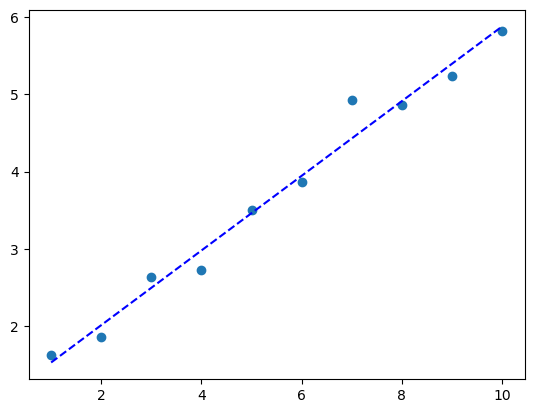

In [10]:
def display_results(model, x, y):
    pred = model(x)
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), pred.data.numpy(), 'b--')

    plt.show()
display_results(model, X, y)